# AB test to increase e-commerce store revenues

A large online retailer has prepared a list of hypotheses to increase revenue. 

# Purpose of the study

1) Prioritize the hypotheses put forward

2) Conduct A/B testing

3) Analyze test results

# Initial data

1) The file 'hypothesis.csv' contains 9 hypotheses to increase the revenue of an online store with the specified parameters Reach, Impact, Confidence, Effort.
2) A/B-test results were obtained and described in the files 'orders.csv' and 'visitors.csv'.

# 1. Hypothesis Prioritization.

## 1.1 Data review and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [3]:
try:
    hypothesis = pd.read_csv(r'D:\Yandex_Data_Analysis\Project_7\hypothesis_eng.csv')
except:
    hypothesis = pd.read_csv(r'/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 130)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Add two new channels to attract traffic, allowing you to attract 30% more users",3,10,8,6
1,"Launch its own delivery service, which will shorten the delivery time of orders",2,5,4,10
2,Add product recommendation blocks to your online store website to increase conversion rate and average order receipt,8,3,7,3
3,"Change the structure of categories, which will increase conversion rates as users will find the product they are looking for f...",8,3,3,8
4,Change the background color of the homepage to increase user engagement,3,1,1,1
5,"Add a customer testimonials page about the store, which will increase orders",3,2,2,3
6,Show banners with current promotions and sales on the homepage to increase conversions,5,3,8,3
7,Add a subscription form to all main pages to gather a customer base for email newsletters,10,7,8,5
8,Run a promotion giving a discount on a product on your birthday,1,9,9,5


As you can see, the data in the table are in good quality. There are no obvious omissions or obvious duplicates. Let's bring the column names to lower case for further convenience.

In [4]:
hypothesis.columns = [a.lower() for a in hypothesis.columns]

## 1.2. Application of ICE framework for hypothesis prioritization

In [5]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Run a promotion giving a discount on a product on your birthday,16.200000
0,"Add two new channels to attract traffic, allowing you to attract 30% more users",13.333333
7,Add a subscription form to all main pages to gather a customer base for email newsletters,11.200000
6,Show banners with current promotions and sales on the homepage to increase conversions,8.000000
2,Add product recommendation blocks to your online store website to increase conversion rate and average order receipt,7.000000
1,"Launch its own delivery service, which will shorten the delivery time of orders",2.000000
5,"Add a customer testimonials page about the store, which will increase orders",1.333333
3,"Change the structure of categories, which will increase conversion rates as users will find the product they are looking for f...",1.125000
4,Change the background color of the homepage to increase user engagement,1.000000


## 1.3. Application of the RICE framework for hypothesis prioritization

In [6]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all main pages to gather a customer base for email newsletters,112.0
2,Add product recommendation blocks to your online store website to increase conversion rate and average order receipt,56.0
0,"Add two new channels to attract traffic, allowing you to attract 30% more users",40.0
6,Show banners with current promotions and sales on the homepage to increase conversions,40.0
8,Run a promotion giving a discount on a product on your birthday,16.2
3,"Change the structure of categories, which will increase conversion rates as users will find the product they are looking for f...",9.0
1,"Launch its own delivery service, which will shorten the delivery time of orders",4.0
5,"Add a customer testimonials page about the store, which will increase orders",4.0
4,Change the background color of the homepage to increase user engagement,3.0


Overall table with the results of the frameworks on RICE and ICE.

In [7]:
hypothesis.loc[:, ['hypothesis','ICE', 'RICE']].sort_values(by=['RICE','ICE'], ascending=False)

,hypothesis,ICE,RICE
7,Add a subscription form to all main pages to gather a customer base for email newsletters,11.200000,112.0
2,Add product recommendation blocks to your online store website to increase conversion rate and average order receipt,7.000000,56.0
0,"Add two new channels to attract traffic, allowing you to attract 30% more users",13.333333,40.0
6,Show banners with current promotions and sales on the homepage to increase conversions,8.000000,40.0
8,Run a promotion giving a discount on a product on your birthday,16.200000,16.2
3,"Change the structure of categories, which will increase conversion rates as users will find the product they are looking for f...",1.125000,9.0
1,"Launch its own delivery service, which will shorten the delivery time of orders",2.000000,4.0
5,"Add a customer testimonials page about the store, which will increase orders",1.333333,4.0
4,Change the background color of the homepage to increase user engagement,1.000000,3.0


## 1.4. Conclusion

The most prioritized hypothesis for ICE is 'Launch a promotion that gives a discount on the product on the birthday', and for RICE is 'Add a subscription form to all main pages to gather a customer base for email newsletters'.

It is noticeable that the prioritization of hypotheses is different for these frame talkers. Since RICE includes another parameter ('Reach' or 'reach'), it was this parameter that influenced the rearrangement of the hypotheses in terms of prioritization.

The hypothesis related to the birthday promotion fell to the 5th place in terms of priority according to RICE, as this promotion is available to users once a year, which significantly limits its application and therefore its reach.

The hypotheses of the RICE framework that scored the highest number of points are the most prioritized. It is recommended to use them when conducting A/B-test.

# 2. A/B test analysis

## 2.1. Data review and preprocessing

In [8]:
try: 
    orders = pd.read_csv('D:\Yandex_Data_Analysis\Project_7\orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


There are no empty values in the order file. The dataset type is correct. Let's check the dataset for obvious duplicates.

In [10]:
orders.duplicated().sum()

0

No obvious duplicates.  
Let's repeat the same steps with the visitors file.

In [11]:
try:
    visitors = pd.read_csv(r'D:\Yandex_Data_Analysis\Project_7\visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

There is also nothing wrong with this table.  
Let's bring the column names of both tables to lower case for further convenience.

In [14]:
orders.columns = [a.lower() for a in orders.columns]
visitors.columns = [a.lower() for a in visitors.columns]

Let's bring the data in the 'date' column to the date format.

In [15]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Let's make sure that the A/A test was performed correctly. The number of users in different groups should not differ by more than 1%.

In [16]:
orders.groupby('group')['visitorid'].nunique()

group
A    503
B    586
Name: visitorid, dtype: int64

As you can see the difference of unique buyers between the two groups is within 1%. The division of the test traffic is performed correctly and will not affect the quality of the analysis.

In [17]:
orders.groupby('group').agg({'visitorid' : 'nunique'})

,visitorid
group,
A,503
B,586


Let's check if there are the same unique users in both groups.

In [18]:
unique_visitors = orders.loc[:, ['visitorid', 'group']].drop_duplicates()
unique_visitors['visitorid'].duplicated().sum()

58

As you can see, there are 58 users who were in both groups. This number is within 10% error, so these users should not distort the analysis much. Let's leave the data of unique users in the table.

## 2.2. Create a graph of cumulative revenue by group.

In [19]:
# create dataframe dates_groups with unique pairs of values 'date' and 'group', table orders; delete duplicates
dates_groups = orders[['date', 'group']].drop_duplicates()


orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', # date
            'group': 'max', # A/B test group
            'transactionid': 'nunique', # number of unique orders in the test group up to and including the specified date
            'visitorid': 'nunique', # number of unique users who have made at least 1 order in the test group
            'revenue': 'sum', # total revenue of orders in the test group up to and including the specified date
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# rename cumulativeData column names
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# variable with data on dates, revenue and number of orders in group A
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# variable with data on dates, revenue and number of orders in group B
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

**Graph of cumulative revenue by group**

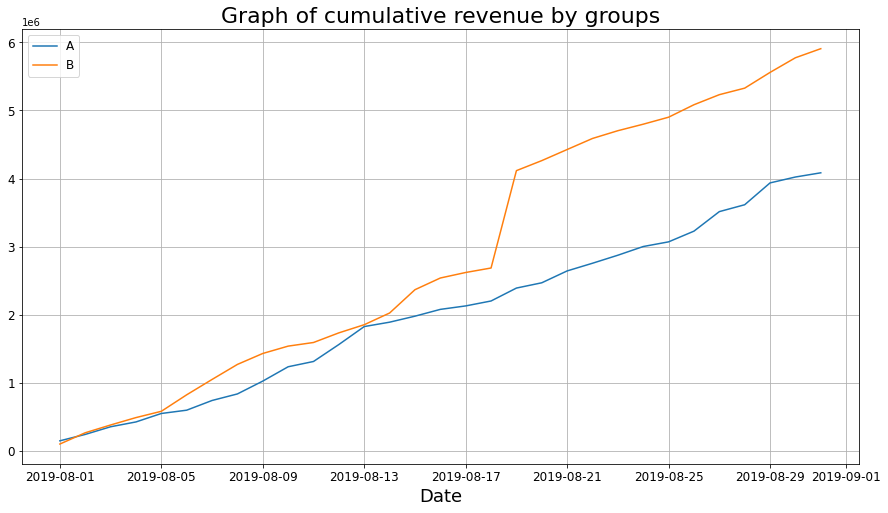

In [20]:
plt.rcParams["figure.figsize"] = (15,8)
# Group A revenue chart
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Group B revenue chart
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.tick_params(labelsize=12)
plt.title('Graph of cumulative revenue by groups', fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.grid(True)
plt.legend(prop={'size': 12});

It is noticeable in the graph that Group A's revenue has been growing evenly all the time. At the same time, the revenue of group B was always slightly higher, but after 17.08.2019 there was a sharp upward jump and the profits increased and remained at the same level. This may be due to an increase in the total number of orders or the average check of goods increased.

## 2.3. Create a graph of cumulative average check by group.

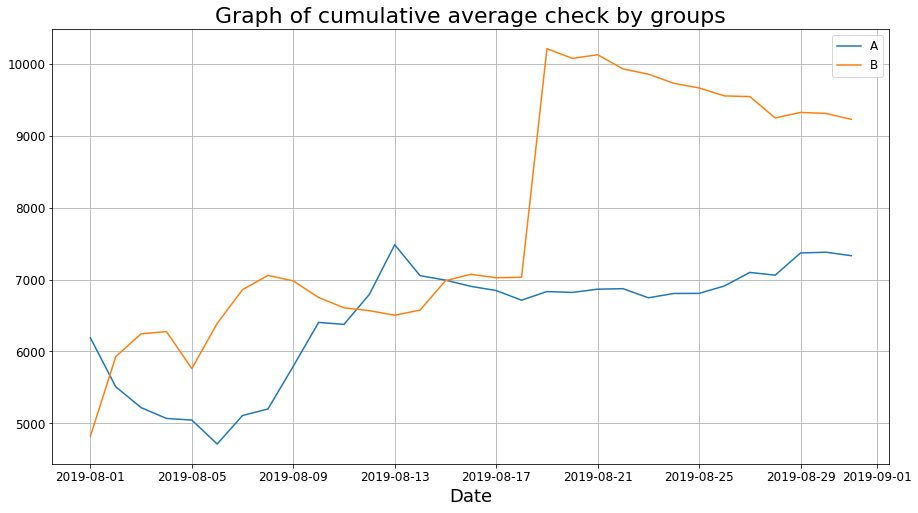

In [21]:
# Group A average check chart
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# Group B average check chart
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Graph of cumulative average check by groups', fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.legend(prop={'size': 12});

As can be seen from the chart, the average check of group A reached its maximum in the middle of August, then there was a slight decline, but by the end of the month it returned to the maximum value. In group B the average check was higher, also in the middle of the month there was a sharp jump up and the following decline. This may be due to the appearance of a large order, which may have confused the true picture.

## 2.4. Create a graph of the relative change in the cumulative average check of group B to group A.

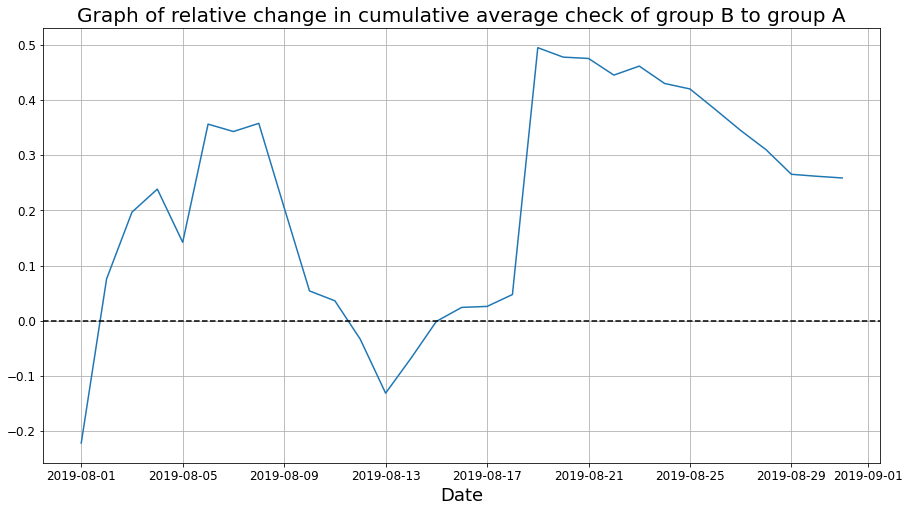

In [22]:
merged_cumulative_revenue  = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['_a', '_b'])

# build the ratio of average checks
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
         /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1);

# add the X-axis
plt.axhline(y=0, color='black', linestyle='--');

plt.title('Graph of relative change in cumulative average check of group B to group A', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.show()

There are several sharp spikes noticeable on the graph. This indicates that there were some very large orders that affected the whole picture.

## 2.5. Creating a cumulative conversion graph by group.

Let's find the earliest and latest dates in the tables.

In [25]:
print('Test start date: ',orders.date.min(),'\n',
      'Test end date: ',orders.date.max(),'\n',
      'Test start date: ',visitors.date.min(),'\n',
      'Test end date: ',visitors.date.max(),sep='')

Test start date: 2019-08-01 00:00:00
Test end date: 2019-08-31 00:00:00
Test start date: 2019-08-01 00:00:00
Test end date: 2019-08-31 00:00:00


The minimum and maximum dates in the two tables are the same - August 1 and August 31, 2019, respectively. These dates will be needed for plotting the graphs.

In [26]:
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


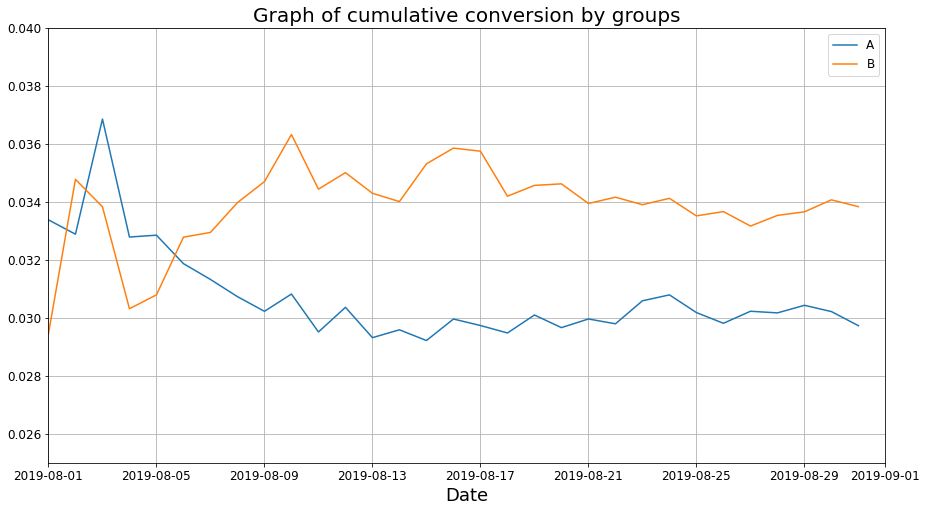

In [27]:
# calculate cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# separate group A data
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# separate group B data
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# plot the graphs
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# set the scale of the axes
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('Graph of cumulative conversion by groups', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.legend(prop={'size': 12});

Conversions of both groups are symmetrical and settled at approximately the same value after 08/13/2019. The conversion of Group B was 0.4% better by the end of the month.

## 2.6. Creating a graph of relative change in cumulative conversion of group B to group A

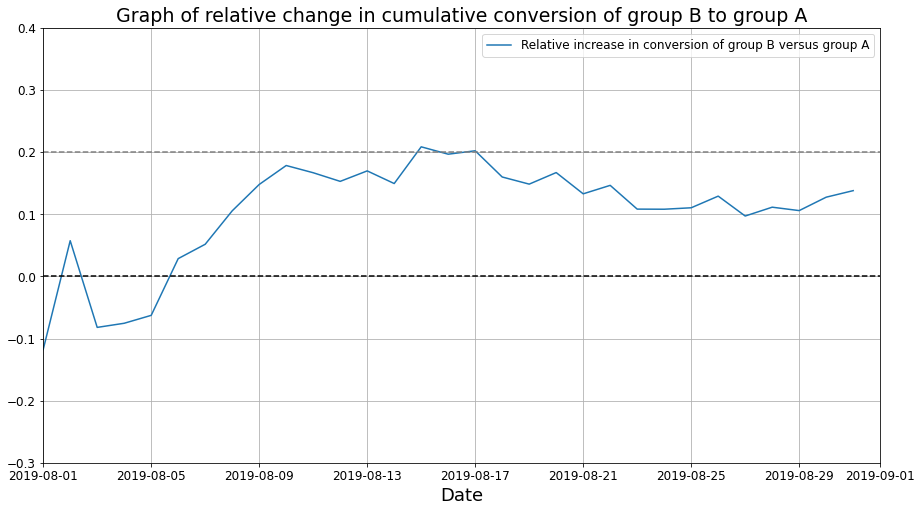

In [28]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['_a', '_b'])

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1, 
         label="Relative increase in conversion of group B versus group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.4])


plt.title('Graph of relative change in cumulative conversion of group B to group A', fontsize = 19)
plt.xlabel('Date', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.legend(prop={'size': 12});

At the beginning of the test, group B was mostly losing to group A, but from August 6, it finally took the lead. From August 8, the increase ranged from 10 to 20%, gradually decreasing by the end of the month.

## 2.7. Creating a dot plot of the number of orders by user

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


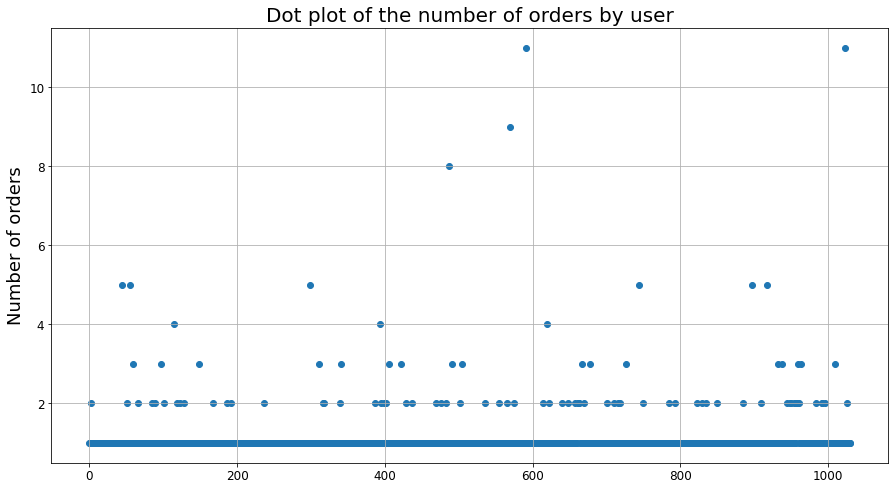

In [29]:
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users.columns = ['visitorid', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

# a series of numbers from 0 to the number of observations in orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']);

plt.title('Dot plot of the number of orders by user', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.show()

There are very few users who have made more than two orders. There is a certain number of users who have made two orders. But in order to estimate how many it is, it is necessary to calculate sample percentiles.

## 2.8. Calculation of the 95th and 99th percentiles of the number of orders per user. Selecting the boundary for defining abnormal users.

In [30]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


No more than 5% of users made more than two orders and no more than 1% of users made more than 4 orders. It is reasonable to take 2 orders per user as the lower limit of the number of orders, and weed out abnormal users exceeding it.

## 2.9. Creating a dot plot of order values

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


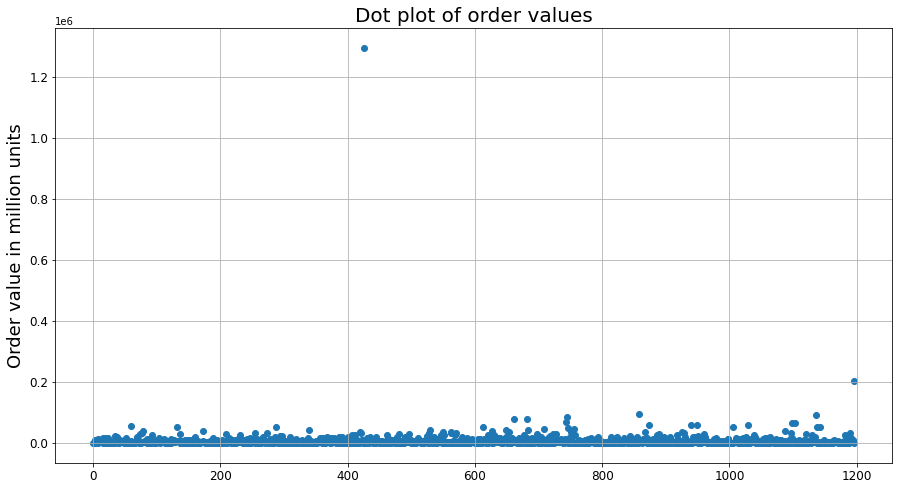

In [31]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Dot plot of order values', fontsize = 20)
plt.ylabel('Order value in million units', fontsize = 18)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.show()

As you would expect - there is one largest order in the database in the amount of 1,294,500 units. This order is highly anomalous compared to other orders. There is also an order of 202,740 units. All other orders are below 93,940 units.

## 2.10. Calculation of the 95th and 99th percentiles of order value. Selecting the boundary for defining abnormal orders

In [32]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


No more than 5% of users have an average check more expensive than 28 thousand units. No more than 1% have an average check more expensive than 58,233.2 units. The limit for defining abnormal orders should be 28 thousand units.

## 2.11. Calculation of statistical significance of differences in conversion between groups using raw data

**Null Hypothesis:** *There are no differences in conversion between groups.*

**Alternative hypothesis:** *There are differences in conversion between groups.*

In [33]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
    {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),axis=1).sort_values(by=['date'])
orders_b_cummulative.columns = [ 'date','orders_cummulative_b','revenue_cummulative_b']

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

# for users who have made at least 1 order, the number of orders will be shown
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['userid', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['userid', 'orders'] 

# users with orders will be matched with the number of user orders, and users without orders will be matched with zeros
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0,
          index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0,
          index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

print('p-value =', "{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Relative increase in the average number of Group B orders:', "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.00840
Relative increase in the average number of Group B orders: 0.138


 p-value = 0.01679 < 0.05, means that the null hypothesis is refuted, hence **there is difference in conversion between groups**.  The relative increase in the conversion rate of group B to group A is **13.8%.**

## 2.12. Calculation of statistical significance of differences in average order receipt between groups using "raw" data

**The null hypothesis:**  *there is no difference in the average check between the groups.*

**Alternative hypothesis:** *There are differences in the average check between the groups.*

In [34]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Relative difference in average check between groups:','{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

p-value = 0.365
Relative difference in average check between groups: 0.259


P-value is much greater than 0.05 - there are no statistically significant differences in the average check between the groups. The relative difference in the average check between the groups is 25.9%.

## 2.13. Calculation of statistical significance of differences in conversion between groups using "cleaned" data

In [35]:
# user slices
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['userid'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['userid'],
    ],
    axis=0,
)

# user slices
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorid']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [36]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['userid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        
        orders_by_users_b[
            np.logical_not(orders_by_users_b['userid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value = 0.00652
0.173


Abnormal users were taken to be those who made 3 orders or more, or made an order of more than 28,000 units. As with the raw data, the p-value did not exceed 0.05, which means that the **null hypothesis is rejected**. Hence there are differences in average check between the groups. Group B was better in terms of conversion by 17.3%.

## 2.14. Calculation of statistical significance of differences in average order receipt between groups using "cleaned" data

In [37]:
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.369
-0.020


The P-value was about the same at 0.738 as with the raw data, i.e. **the null hypothesis is confirmed**. But group B's average check decreased so much that group A began to outperform B, but only by 2%. After "cleaning" the data, removing outliers, the difference in average check between the two groups was reduced to a minimum.

# 3. Conclusion

The graph of the conversion difference between groups reports that the results of group B are better than group A: fixed near the mean value.

The graph of the average check difference fluctuates a lot, which indicates the presence of anomalies (single very expensive purchases).

The results of the test revealed a statistically significant difference in conversion between the groups both in the "raw" and in the data after filtering anomalies, but statistically significant differences in the average check were not recorded in both cases.

Based on the discovered facts, the test should be stopped and the victory of group B should be recorded, the conversion results of which were better than those of group A by 13.8% and 17.3% before and after data cleaning, respectively.